In [482]:
import pandas as pd
import matplotlib.pyplot as plt



In [483]:
df = pd.read_csv("../../../data/superstore.csv", encoding="latin-1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [485]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [486]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [487]:
df.duplicated().sum()

np.int64(0)

## Analisis EDA

- La estructura de los datos esta compuesta por 20 variables y casi 10k de registros
- Se detecta de que se trata de una ventas las cuales son embarcadas (con la fecha de salida), q pudo haberse llevado en las diferentes clases (varia el precio?), a cierto destino
- Se puede observar los nombre y Id de los customer (segun sea de q segmento sea) y en q ubicacion exacta se realizo (pais, ciudad, estado, postal y region)
- Tambien q producto se llevo viendo de q categoria, sub y el nombre por ultimo y cuanto es lo q sale ademas de la cantidad, si hubo descuento y cuanta ganancia se saco (profit, posi o negativa)

- Calidad de los datos se ve perfecta, no tiene datos nulos ni duplicados, lo que si hay q cambiar el tipo de datos de las fechas, asi hacer luego analisis por año o mes

In [488]:
# conversion de las columnas de fecha a formato datetime
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [489]:
# Crear una nueva columna "Total Sales" multiplicando "Sales" por "Quantity", teniendo hacia el total de ventas por cada fila
df["Total Sales"] = df["Sales"] * df["Quantity"]
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Total Sales
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896,1149.495905
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.444000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,48.693500
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,183.680000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,763.201500
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,135830.880000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,3898.666090


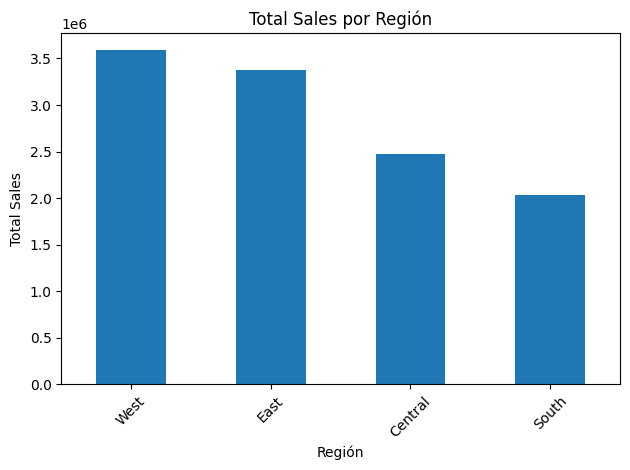

In [490]:
# Aca se ve cual fue la region con mas ventas totales, de manera ordenada de mayor a menor
df.groupby("Region")["Total Sales"].sum().sort_values(ascending=False).plot(kind="bar")
plt.title("Total Sales por Región")
plt.xlabel("Región")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

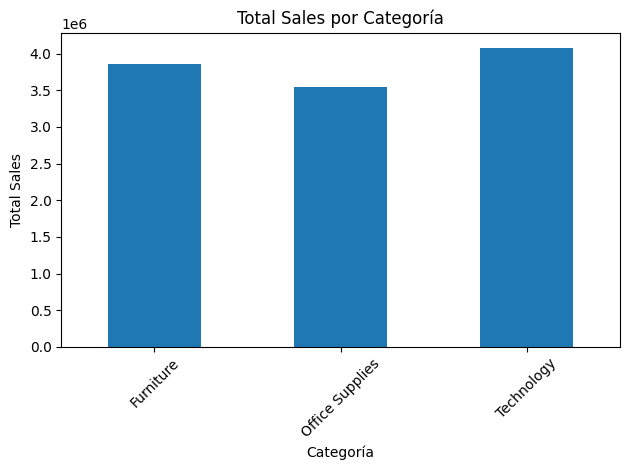

In [491]:
# Aca se puede ver la categoria con mas ventas totales, de manera ordenada de mayor a menor
df.groupby("Category")["Total Sales"].sum().plot(kind="bar")
plt.title("Total Sales por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

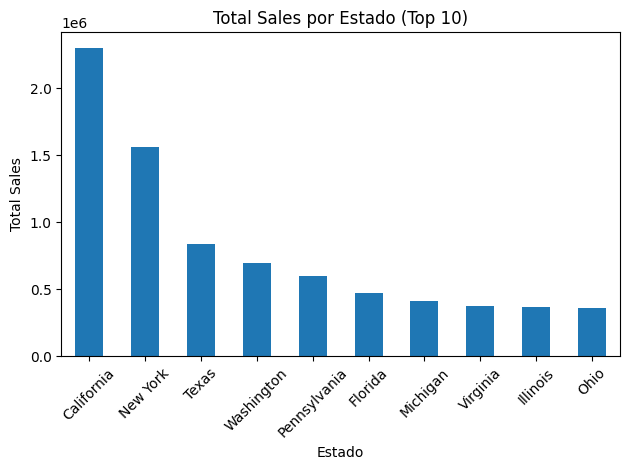

In [492]:
# Aca se puede ver el top 10 de los estados con mas ventas totales, de manera ordenada de mayor a menor
df.groupby("State")["Total Sales"].sum().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Total Sales por Estado (Top 10)")
plt.xlabel("Estado")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [493]:
# cantidad de ventas (numerica) q se realizo en cada state (top 10)
df_cantidad_ventas_estados = df.groupby("State").size().sort_values(ascending=False)
print(df_cantidad_ventas_estados.head(10))

State
California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
dtype: int64


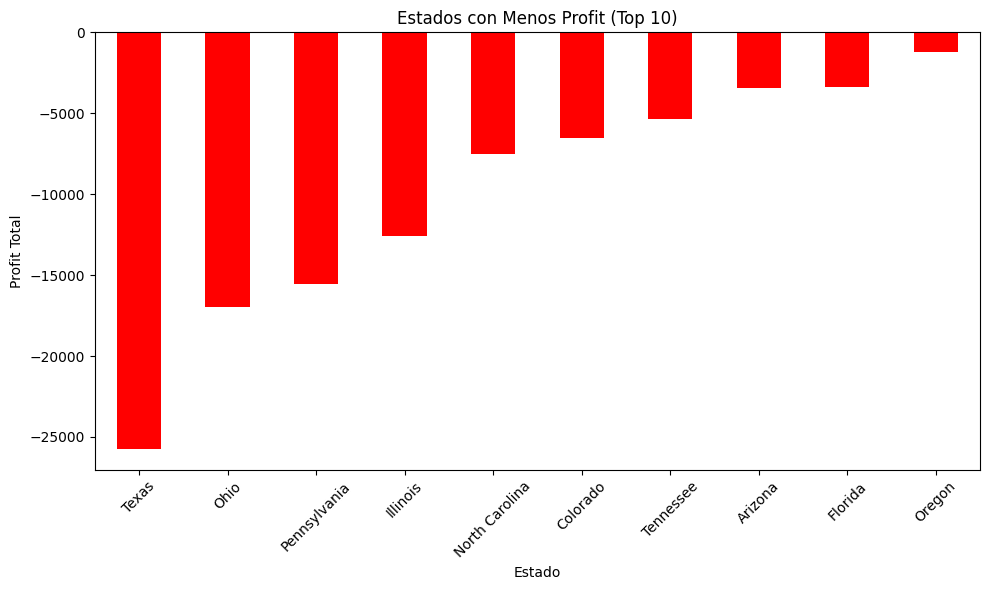

In [494]:
# estado el cual tuvo menos profit, de manera ordenada de menor a mayor
df_perdida_estados = df.groupby("State")["Profit"].sum().sort_values().head(10)
plt.figure(figsize=(10, 6))
df_perdida_estados.plot(kind="bar", color="red")
plt.title("Estados con Menos Profit (Top 10)")
plt.xlabel("Estado")
plt.ylabel("Profit Total")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

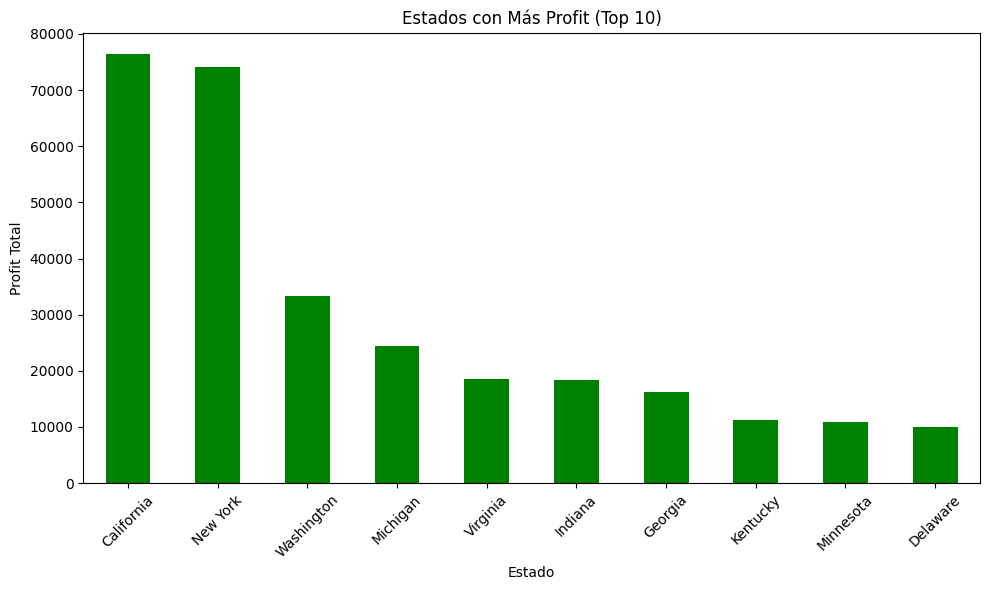

In [495]:
# estados con mas profit, de manera ordenada de mayor a menor
df_profit_estados = df.groupby("State")["Profit"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
df_profit_estados.plot(kind="bar", color="green")
plt.title("Estados con Más Profit (Top 10)")
plt.xlabel("Estado")
plt.ylabel("Profit Total")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

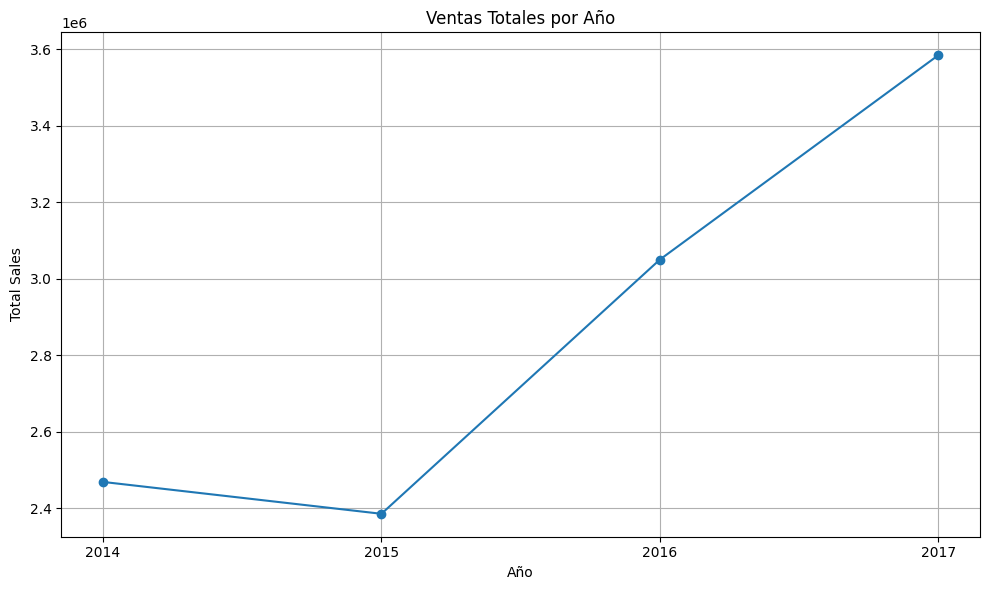

In [496]:
# grafico anual de ventas totales por año
df["Year"] = df["Order Date"].dt.year
df_ventas_anuales = df.groupby("Year")["Total Sales"].sum()
plt.figure(figsize=(10, 6))
df_ventas_anuales.plot(kind="line", marker="o")
plt.title("Ventas Totales por Año")
plt.xlabel("Año")
plt.ylabel("Total Sales")
plt.xticks(df["Year"].unique())
plt.grid()
plt.tight_layout()
plt.show()

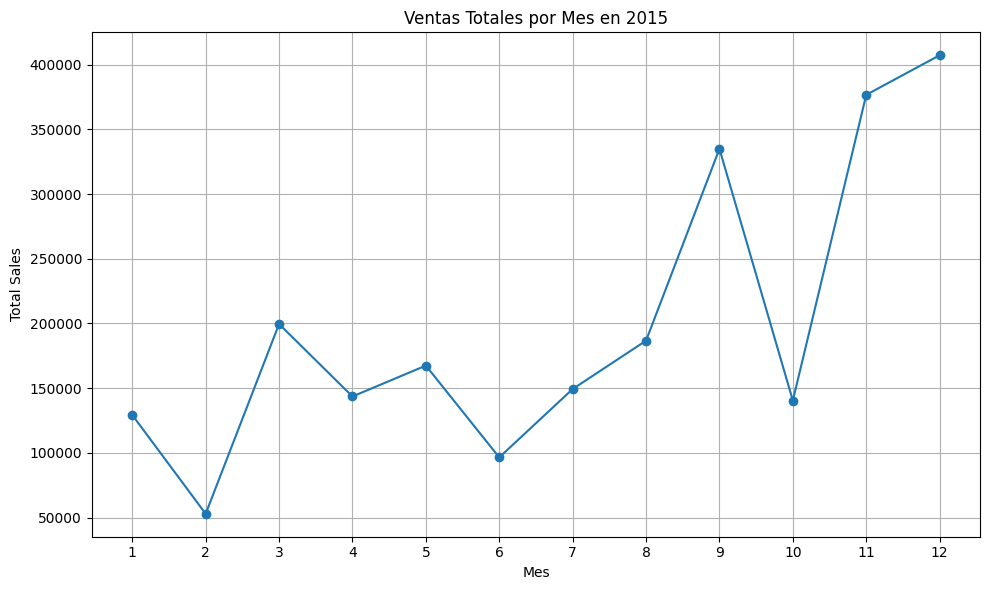

In [497]:
# q paso en el año 2015?, ver la cantidad de ventas por mes en el año 2015
df_2015 = df[df["Year"] == 2015]
df_ventas_mensuales_2015 = df_2015.groupby(df_2015["Order Date"].dt.month)["Total Sales"].sum()
plt.figure(figsize=(10, 6))
df_ventas_mensuales_2015.plot(kind="line", marker="o")
plt.title("Ventas Totales por Mes en 2015")
plt.xlabel("Mes")
plt.ylabel("Total Sales")
plt.xticks(range(1, 13))
plt.grid()
plt.tight_layout()
plt.show()

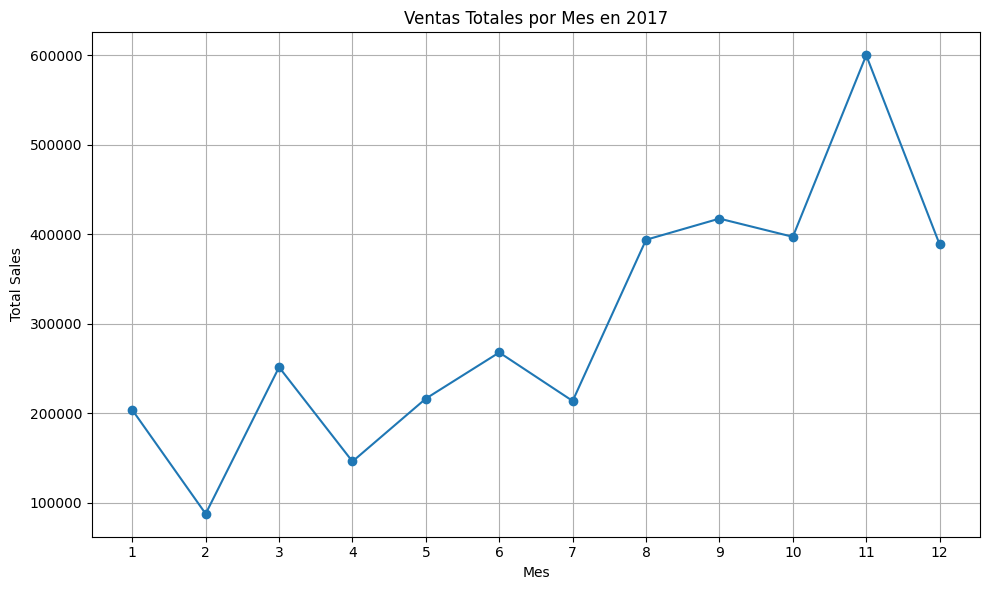

In [498]:
# ahora ver la cantidad de ventas q se realizo por mes en el año 2017
df_2017 = df[df["Year"] == 2017]
df_ventas_mensuales_2017 = df_2017.groupby(df_2017["Order Date"].dt.month)["Total Sales"].sum()
plt.figure(figsize=(10, 6))
df_ventas_mensuales_2017.plot(kind="line", marker="o")
plt.title("Ventas Totales por Mes en 2017")
plt.xlabel("Mes")
plt.ylabel("Total Sales")
plt.xticks(range(1, 13))
plt.grid()
plt.tight_layout()
plt.show()

In [499]:
# cantidad de ventas q se realizaron por año
df_cantidad_ventas_anuales = df.groupby("Year").size()
print(df_cantidad_ventas_anuales)

Year
2014    1993
2015    2102
2016    2587
2017    3312
dtype: int64


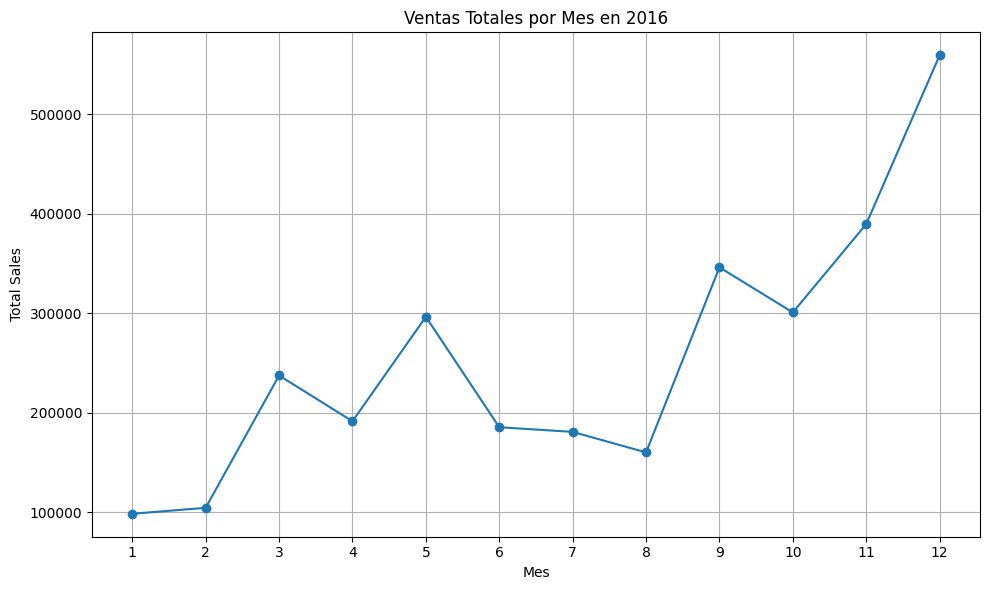

In [500]:
# cantdad de ventas totales en los diferentes meses en el año 2016
df_2016 = df[df["Year"] == 2016]
cantidad_ventas_2016 = df_2016.groupby(df_2016["Order Date"].dt.month)["Total Sales"].sum()
plt.figure(figsize=(10, 6))
cantidad_ventas_2016.plot(kind="line", marker="o")
plt.title("Ventas Totales por Mes en 2016")
plt.xlabel("Mes")
plt.ylabel("Total Sales")
plt.xticks(range(1, 13))
plt.grid()
plt.tight_layout()
plt.show()

## Deteccion

- se ve de que aunque en las mayores ventas (top 10) se encuentran Texas, Ohio, Pennsylvania, Illinois y North Carolina, las cuales se encuentran como top 5 con menos profit sacado en las ventas, lo mas fuerte fue pasando de -25k y luego disminuye hasta de diferencia -7.5k
- se ve de que en el top 10 mas ventas en cada estado, los q mas sacaron profit fueron California, New York (con mayor diferencia), despues baja desde Washington, Michigan y Virgina (bajando como 40k) 
- ademas de poder ver q entre Virginia y lo q le sigue el profit se mantuvo bastante entre los 20k y 10k
- se puede observar q en el grafico de linea anual entre los años de venta, entre 2014 y 2017, tuvo un gran cambio drastico a partir de 2015, siendo una mejora del doble de ventas, hasta llegar a 2017,  eso quiere decir q hubo buenos cambios y mejor aceptacion en el mercado, cuales fueron las ventas entre el 2016 y 2017 ya que en los anteriores años se ve una mejor de 275aprox de ventas
- viendo los resultados de ventas totales sumadas en los diferentes meses del mejor y el peor, hay q sacar cuales estados compraron en esos meses y cuanta cantidad de profit se obtuvo, ya q se ve q en noviembre se realiza mayores ventas en los 2 años, pero en los anteriores meses se ve una baja venta o muy estandar, cual fue la categoria menos vendida en esos meses y cual fue la mas vendida en noviembre
- entre el mes 1 y el 8 q pasa?, en los ultimos meses del año son los mejores q pasa?

In [501]:
# cantidad de ventas q se hizo en la region sur en el año 2015, ejemplo de como usar las date
df_south_2015 = df[(df["Region"] == "South") & (df["Order Date"].dt.year == 2015)]
total_sales_south_2015 = df_south_2015["Total Sales"].sum()
print(f"Total Sales en la región Sur en 2015: {total_sales_south_2015:.2f}")


Total Sales en la región Sur en 2015: 402645.22
